In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time



In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)

df.sort_values(['Driver_ID','MMM-YY'],inplace=True,ascending=True)
print(df.head())
print(df.shape)

<ipython-input-3-071f2acdf500>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)


   Unnamed: 0     MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0 2019-01-01          1  28.0     0.0  C23                2   
1           1 2019-02-01          1  28.0     0.0  C23                2   
2           2 2019-03-01          1  28.0     0.0  C23                2   
3           3 2020-11-01          2  31.0     0.0   C7                2   
4           4 2020-12-01          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387    2018-12-24             NaT                    1      1   
1   57387    2018-12-24             NaT                    1      1   
2   57387    2018-12-24      2019-03-11                    1      1   
3   67016    2020-11-06             NaT                    2      2   
4   67016    2020-11-06             NaT                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480           

<ipython-input-3-071f2acdf500>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)
<ipython-input-3-071f2acdf500>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/driver_churn.csv',parse_dates=['MMM-YY','Dateofjoining','LastWorkingDate'],infer_datetime_format=True)
<ipython-input-3-071f2acdf500>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/con

In [ ]:
# df[['Driver_ID','Dateofjoining','LastWorkingDate']].head(30)

In [ ]:
df_agg=df.groupby('Driver_ID').agg(start_date=("Dateofjoining",'first'),end_date=("LastWorkingDate",'last'),end_reportdate=("MMM-YY",'last'),
                                  age_start=("Age",'first'),age_end=("Age",'last'),
                                 income_start=("Income",'first'),income_max=("Income",'last'),grade_start=("Grade",'first'),grade_end=("Grade",'last'),
                                 agg_bizvalue=("Total Business Value",'sum'),
                                 rating_worst=("Quarterly Rating",'min'),rating_best=("Quarterly Rating",'max'),rating_median=("Quarterly Rating",'median'),rating_end=("Quarterly Rating",'last'),
                                 gender=("Gender",'first'),edu=("Education_Level",'first')).reset_index()
df_agg['hasquit']=df_agg['end_date'].isnull()
# df_agg.loc[df['hasquit'],'end_date']=

In [ ]:
df_agg['start_day']=df_agg['start_date'].dt.day
df_agg['start_month']=df_agg['start_date'].dt.month
df_agg['start_year']=df_agg['start_date'].dt.year

df_agg['end_day']=df_agg['end_date'].dt.day
df_agg['end_month']=df_agg['end_date'].dt.month
df_agg['end_year']=df_agg['end_date'].dt.year

df_agg['days_service']=np.where(df_agg['end_date'].isnull(),(df_agg['end_reportdate']-df_agg['start_date']).dt.days,(df_agg['end_date']-df_agg['start_date']).dt.days)

# Ignoring drivers who has just joined on Dec 2020
df_agg.drop(index=df_agg[df_agg['days_service']<0].index,inplace=True)
df_agg.drop(columns=['start_date','end_date','end_reportdate'],inplace=True)

df_agg.head(10)

,Driver_ID,age_start,age_end,income_start,income_max,grade_start,grade_end,agg_bizvalue,rating_worst,rating_best,...,gender,edu,hasquit,start_day,start_month,start_year,end_day,end_month,end_year,days_service
0,1,28.0,28.0,57387,57387,1,1,1715580,2,2,...,0.0,2,False,24,12,2018,11.0,3.0,2019.0,77.0
1,2,31.0,31.0,67016,67016,2,2,0,1,1,...,0.0,2,True,6,11,2020,NaN,NaN,NaN,25.0
2,4,43.0,43.0,65603,65603,2,2,350000,1,1,...,0.0,2,False,7,12,2019,27.0,4.0,2020.0,142.0
3,5,29.0,29.0,46368,46368,1,1,120360,1,1,...,0.0,0,False,9,1,2019,7.0,3.0,2019.0,57.0
4,6,31.0,31.0,78728,78728,3,3,1265000,1,2,...,1.0,1,True,31,7,2020,NaN,NaN,NaN,123.0
5,8,34.0,34.0,70656,70656,3,3,0,1,1,...,0.0,0,False,19,9,2020,15.0,11.0,2020.0,57.0
7,12,35.0,35.0,28116,28116,1,1,2607180,1,4,...,0.0,2,False,29,6,2019,21.0,12.0,2019.0,175.0
8,13,29.0,31.0,119227,119227,4,4,10213040,1,2,...,0.0,2,False,28,5,2015,25.0,11.0,2020.0,2008.0
9,14,39.0,39.0,19734,19734,3,3,0,1,1,...,1.0,0,True,16,10,2020,NaN,NaN,NaN,46.0
10,16,30.0,30.0,52963,52963,2,2,346800,1,1,...,1.0,0,False,30,11,2018,22.0,2.0,2019.0,84.0


In [ ]:
df_agg.describe(include='all')

,Driver_ID,age_start,age_end,income_start,income_max,grade_start,grade_end,agg_bizvalue,rating_worst,rating_best,...,gender,edu,hasquit,start_day,start_month,start_year,end_day,end_month,end_year,days_service
count,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2.321000e+03,2321.000000,2321.000000,...,2321.000000,2321.000000,2321,2321.000000,2321.000000,2321.000000,1616.000000,1616.000000,1616.000000,2321.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1402.725980,33.124946,33.712193,59262.130547,59390.460577,2.080569,2.099095,4.705167e+06,1.146489,1.953468,...,0.410599,1.007755,NaN,15.849634,7.244722,2018.498492,16.853960,6.358911,2019.483292,435.834985
std,807.939458,5.856023,5.997907,28422.040528,28531.777181,0.935860,0.946228,9.214220e+06,0.412203,1.108932,...,0.492049,0.816284,NaN,9.439794,3.093305,1.612752,9.106577,3.477823,0.506031,567.208767
min,1.000000,21.000000,21.000000,10747.000000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,1.000000,...,0.000000,0.000000,NaN,1.000000,1.000000,2013.000000,1.000000,1.000000,2018.000000,0.000000
25%,698.000000,29.000000,29.000000,38945.000000,38945.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,...,0.000000,0.000000,NaN,7.000000,5.000000,2018.000000,9.000000,3.000000,2019.000000,98.000000
50%,1407.000000,33.000000,33.000000,55263.000000,55313.000000,2.000000,2.000000,9.037300e+05,1.000000,2.000000,...,0.000000,1.000000,NaN,15.000000,7.000000,2019.000000,17.000000,6.000000,2019.000000,186.000000
75%,2110.000000,37.000000,37.000000,76069.000000,76092.000000,3.000000,3.000000,4.346800e+06,1.000000,3.000000,...,1.000000,2.000000,NaN,25.000000,10.000000,2020.000000,25.000000,9.000000,2020.000000,486.000000


In [ ]:
df_agg[['log_income_start','log_income_max']]=np.log(df_agg[['income_start','income_max']])

df_agg['is_bizvalue_neg']=df_agg['agg_bizvalue']<0
df_agg['log_agg_bizvalue']=np.where(df_agg['agg_bizvalue']>0,np.log(df_agg['agg_bizvalue']),0)
df_agg.drop(columns=['income_start','income_max','agg_bizvalue'],inplace=True)
df_agg.isnull().sum()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0
Driver_ID,0
age_start,0
age_end,0
grade_start,0
grade_end,0
rating_worst,0
rating_best,0
rating_median,0
rating_end,0
gender,0



Todo
*   Distribution of quit and retained
*   Monthy trend for joining and quitting
*   Distribution of gender in quit and retained
*   Distribution of grades in quit and retained
*   Any promotions?
*   Distribution of age at joining and quitting
*   Distribution of working period length and joining and quitting
*   what is the rating at the time of quitting? what is the avg. rating between retained and quit?



hasquit
False    1616
True      705
Name: count, dtype: int64


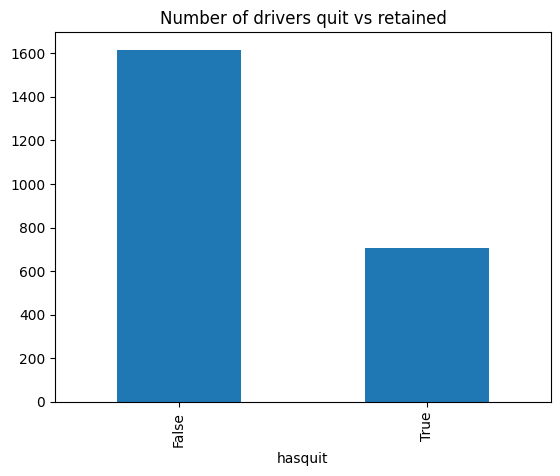

In [ ]:
print(df_agg['hasquit'].value_counts())

df_agg['hasquit'].value_counts().plot(kind='bar')
plt.title('Number of drivers quit vs retained')
plt.show()



This is a mildly imabalanced dataset

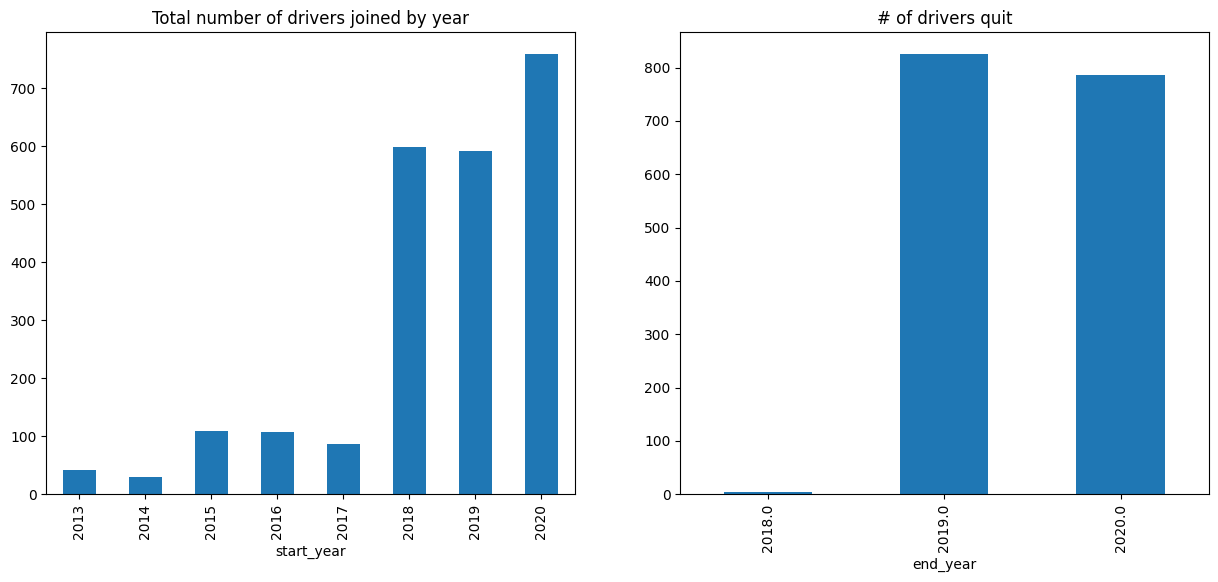

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
df_agg.groupby('start_year')['Driver_ID'].count().plot(kind='bar')
plt.title('Total number of drivers joined by year')

plt.subplot(122)
df_agg.groupby('end_year')['hasquit'].count().plot(kind='bar')
plt.title('# of drivers quit')

plt.show()

Number of drivers joining has taken off from 2018, but in an year number of drivers quitting has also shot up

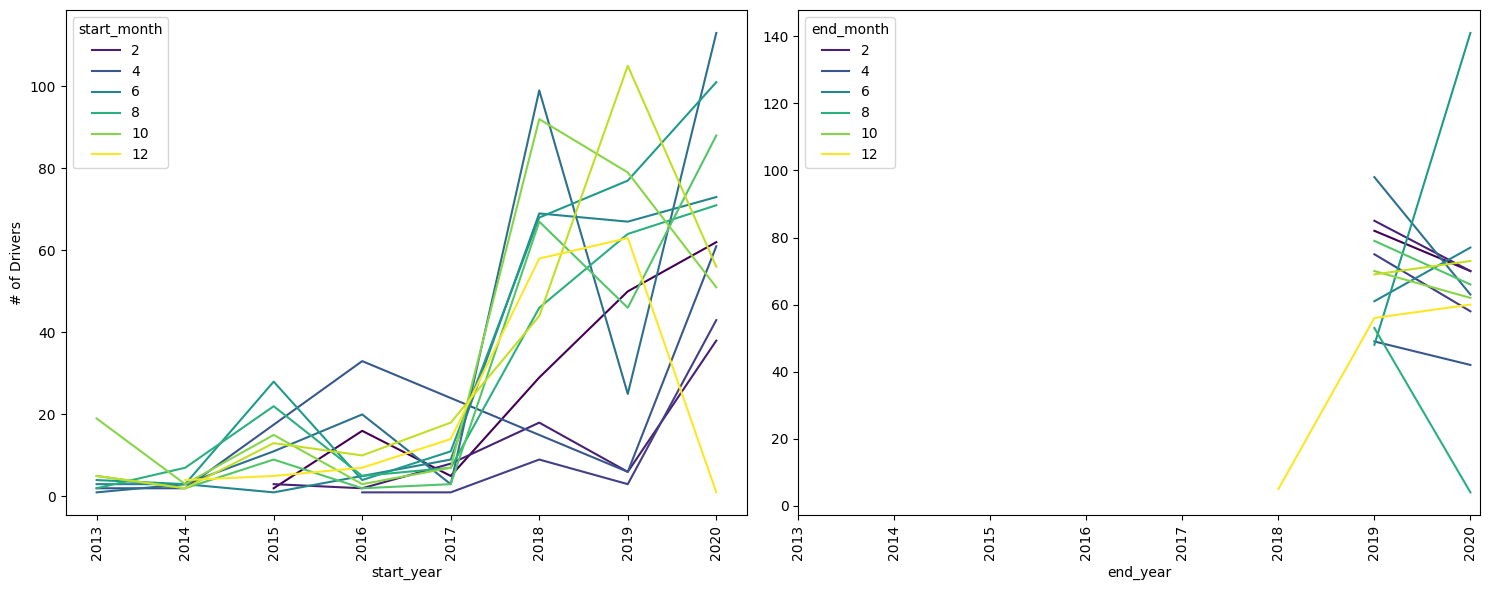

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.lineplot(data=df_agg.groupby(['start_year','start_month'])['Driver_ID'].agg('count').reset_index(),x='start_year',y='Driver_ID',hue='start_month',palette='viridis')
plt.xticks(np.arange(2013,2021,1),rotation=90)
plt.ylabel('# of Drivers')

plt.subplot(122)
sns.lineplot(data=df_agg.groupby(['end_year','end_month'])['Driver_ID'].agg('count').reset_index(),x='end_year',y='Driver_ID',hue='end_month',palette='viridis')
plt.xticks(np.arange(2013,2021,1),rotation=90)
plt.ylabel('')

plt.tight_layout()

Typically drivers joined after first quarter in the year, But there is no such clear trend for quitting

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 2380
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         2321 non-null   int64  
 1   age_start         2321 non-null   float64
 2   age_end           2321 non-null   float64
 3   grade_start       2321 non-null   int64  
 4   grade_end         2321 non-null   int64  
 5   rating_worst      2321 non-null   int64  
 6   rating_best       2321 non-null   int64  
 7   rating_median     2321 non-null   float64
 8   rating_end        2321 non-null   int64  
 9   gender            2321 non-null   float64
 10  edu               2321 non-null   int64  
 11  hasquit           2321 non-null   bool   
 12  start_day         2321 non-null   int32  
 13  start_month       2321 non-null   int32  
 14  start_year        2321 non-null   int32  
 15  end_day           1616 non-null   float64
 16  end_month         1616 non-null   float64
 17  

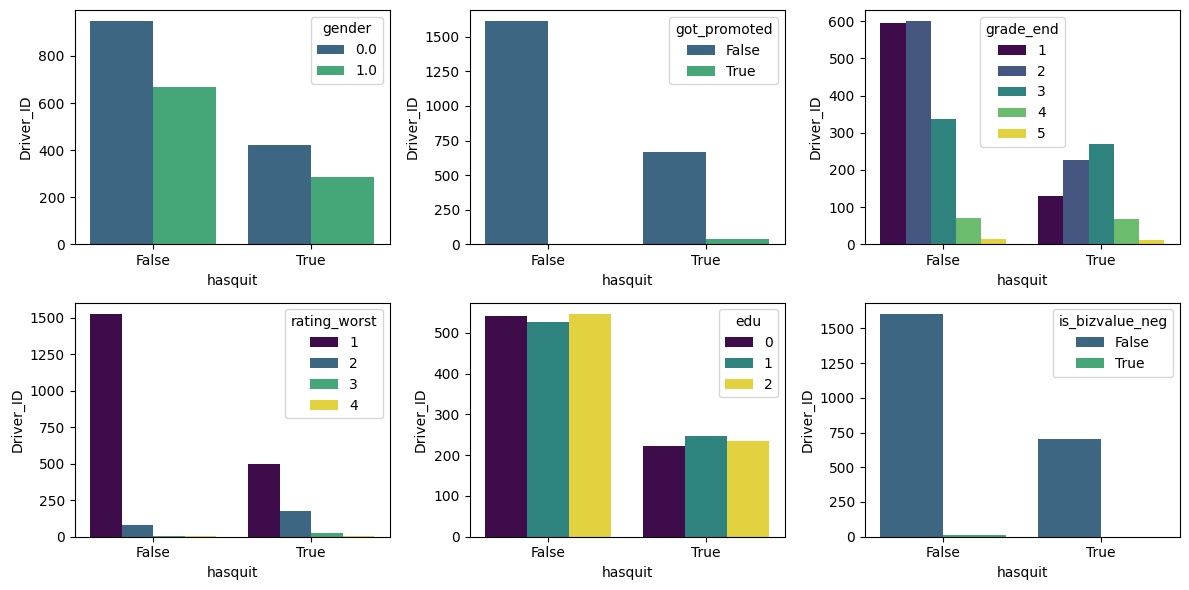

In [ ]:
# print(pd.crosstab(index=df_agg['gender'],columns=df_agg['hasquit'],values=df_agg['Driver_ID'],aggfunc='count'))

df_agg['got_promoted']=df_agg['grade_end']>df_agg['grade_start']

cat_feats=['gender','got_promoted','grade_end','rating_worst','edu','is_bizvalue_neg']

plt.figure(figsize=(12,6))
for inx,feat in enumerate(cat_feats):
  plt.subplot(2,3,inx+1)
  sns.barplot(data=df_agg.groupby(['hasquit',feat])['Driver_ID'].agg('count').reset_index(),x='hasquit',y='Driver_ID',hue=feat,palette='viridis')


plt.tight_layout()
plt.show()

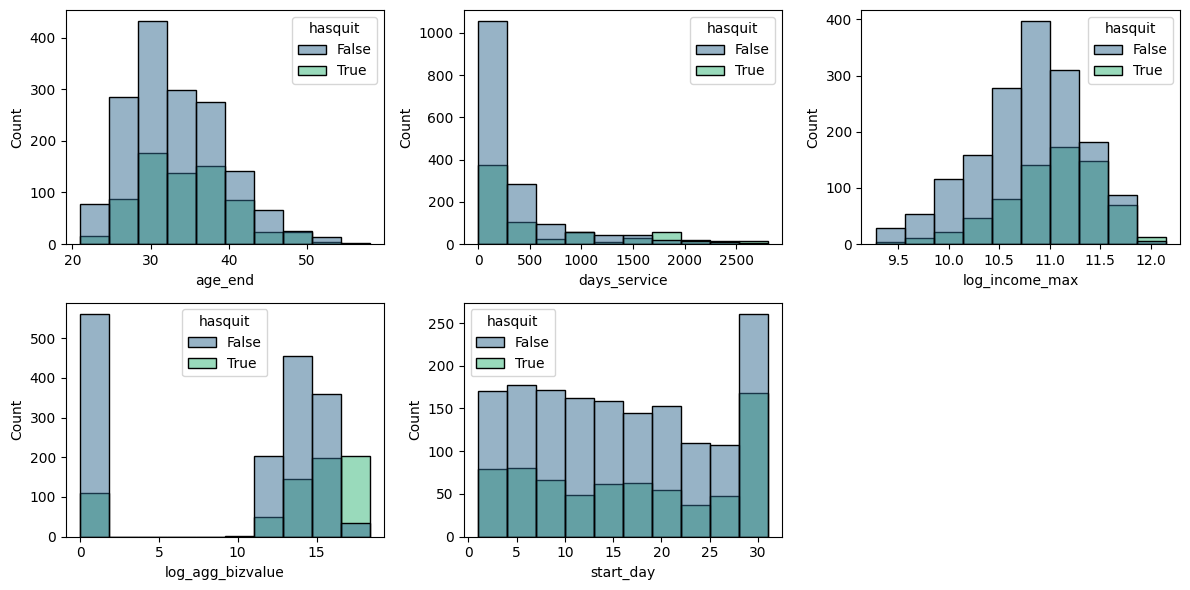

In [ ]:
num_feats=['age_end','days_service','log_income_max','log_agg_bizvalue','start_day']

plt.figure(figsize=(12,6))
for inx,feat in enumerate(num_feats):
  plt.subplot(2,3,inx+1)
  sns.histplot(data=df_agg,x=feat,hue='hasquit',palette='viridis',bins=10)


plt.tight_layout()
plt.show()

# Inferences from EDA

*   Distribution of quit and retained - The distribution is imbalanced with drivers who quit are in the minority class. Minority class is about 32% of total data meaning this is mildly imbalanced

*   Monthy/Yearly trend for joining and quitting -
	Number of drivers joining grew drastically from 2018 onwards. Suggesting a Possible business expansion that year. After a stable growth in 2018-19, there is another jump in 2020. A large number of drivers started quitting from 2019.
	There is no clear trend in which month the drivers are recruited until 2018. However rom 2018 onwards more drivers joined between May to Dec.

*   Distribution of gender in quit and retained
     There is no clear separation between genders in the drivers that stayed or quit
     
*   Distribution of grades in quit and retained. Any promotions?
    A very small proportion of drivers got promoted (\~1.8%. n=43). Of all the drivers that got promoted, most of them quit (~93%) implying that the reason for quitting is not growth stagnation.
    Most drivers who stayed were entry level (grade 1-2), however most drivers who quit were experienced (grade 3). This could probably mean that experienced drivers are moving to alternate careers.
    
*   Distribution of age at joining and quitting


*   Distribution of working period length and retained and quitting
	Working period duration is a right skewed distribution in both retained and quitting groups

*   what is the rating at the time of quitting? what is the avg. rating between retained and quit?
	Most drivers received low rating in the group that is retained and quit. There is no clear correlation between median rating or the last rating on driver quitting.

*   Distribution of edu qualifications
	Educational qual distribution is same between groups that stayed and quit

*   Distribution of business value
   Aggregated business value is extremely right skewed. Unclear why some drivers generate such high value



In [ ]:
df_agg.drop(columns='Driver_ID',inplace=True)
# plt.figure(figsize=(15,15))
# sns.heatmap(df_agg.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

In [ ]:
df_agg.describe()

,age_start,age_end,grade_start,grade_end,rating_worst,rating_best,rating_median,rating_end,gender,edu,start_day,start_month,start_year,end_day,end_month,end_year,days_service,log_income_start,log_income_max,log_agg_bizvalue
count,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,1616.000000,1616.000000,1616.000000,2321.000000,2321.000000,2321.000000,2321.000000
mean,33.124946,33.712193,2.080569,2.099095,1.146489,1.953468,1.589617,1.438604,0.410599,1.007755,15.849634,7.244722,2018.498492,16.853960,6.358911,2019.483292,435.834985,10.867265,10.869022,10.398133
std,5.856023,5.997907,0.935860,0.946228,0.412203,1.108932,0.802705,0.817244,0.492049,0.816284,9.439794,3.093305,1.612752,9.106577,3.477823,0.506031,567.208767,0.515498,0.516379,6.764893
min,21.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,2018.000000,0.000000,9.282382,9.282382,0.000000
25%,29.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.000000,5.000000,2018.000000,9.000000,3.000000,2019.000000,98.000000,10.569906,10.569906,0.000000
50%,33.000000,33.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,15.000000,7.000000,2019.000000,17.000000,6.000000,2019.000000,186.000000,10.919859,10.920763,13.714286
75%,37.000000,37.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,25.000000,10.000000,2020.000000,25.000000,9.000000,2020.000000,486.000000,11.239396,11.239698,15.284951
max,58.000000,58.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,31.000000,12.000000,2020.000000,31.000000,12.000000,2020.000000,2801.000000,12.146418,12.146418,18.372866


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_agg=df_agg.replace({False:0,True:1})
X=df_agg.drop(columns=['hasquit','end_day','end_month','end_year'])
y=df_agg['hasquit']

X_scaled=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)



In [ ]:
X_scaled.shape

(2321, 19)

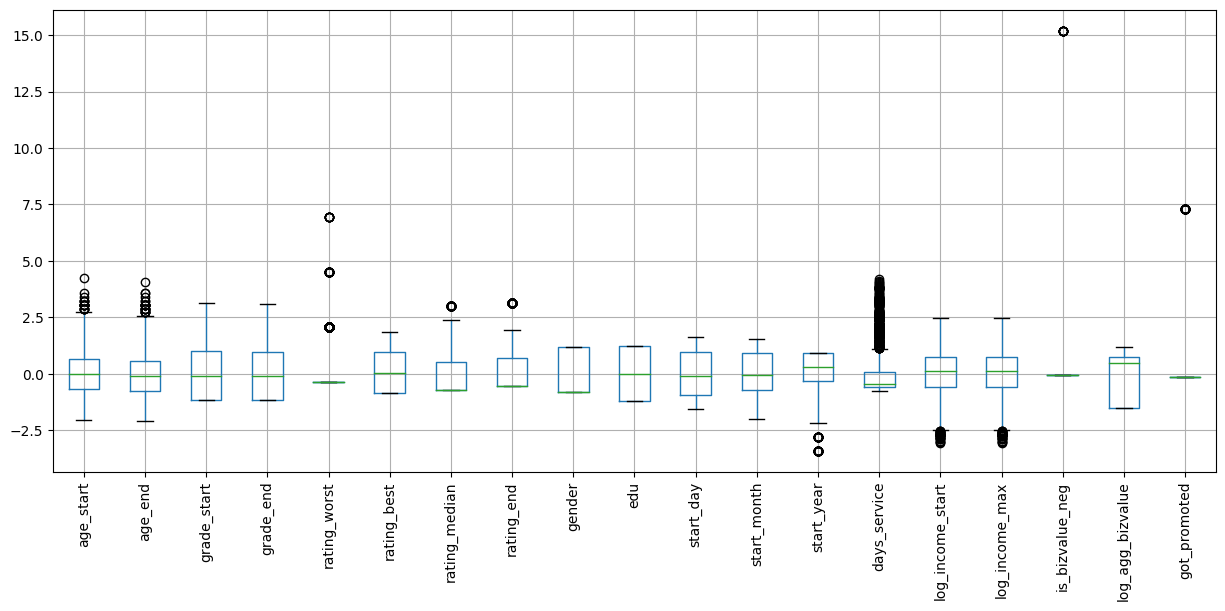

In [ ]:
plt.figure(figsize=(15,6))
X_scaled.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(np.sum(y==0))
print(np.sum(y==1))

1616
705


In [ ]:
import pickle

with open('/content/gdrive/My Drive/Colab Notebooks/driver_churn.pkl','wb') as file:
  pickle.dump(X_scaled,file)
  pickle.dump(y,file)
  pickle.dump(X,file)



<Axes: >

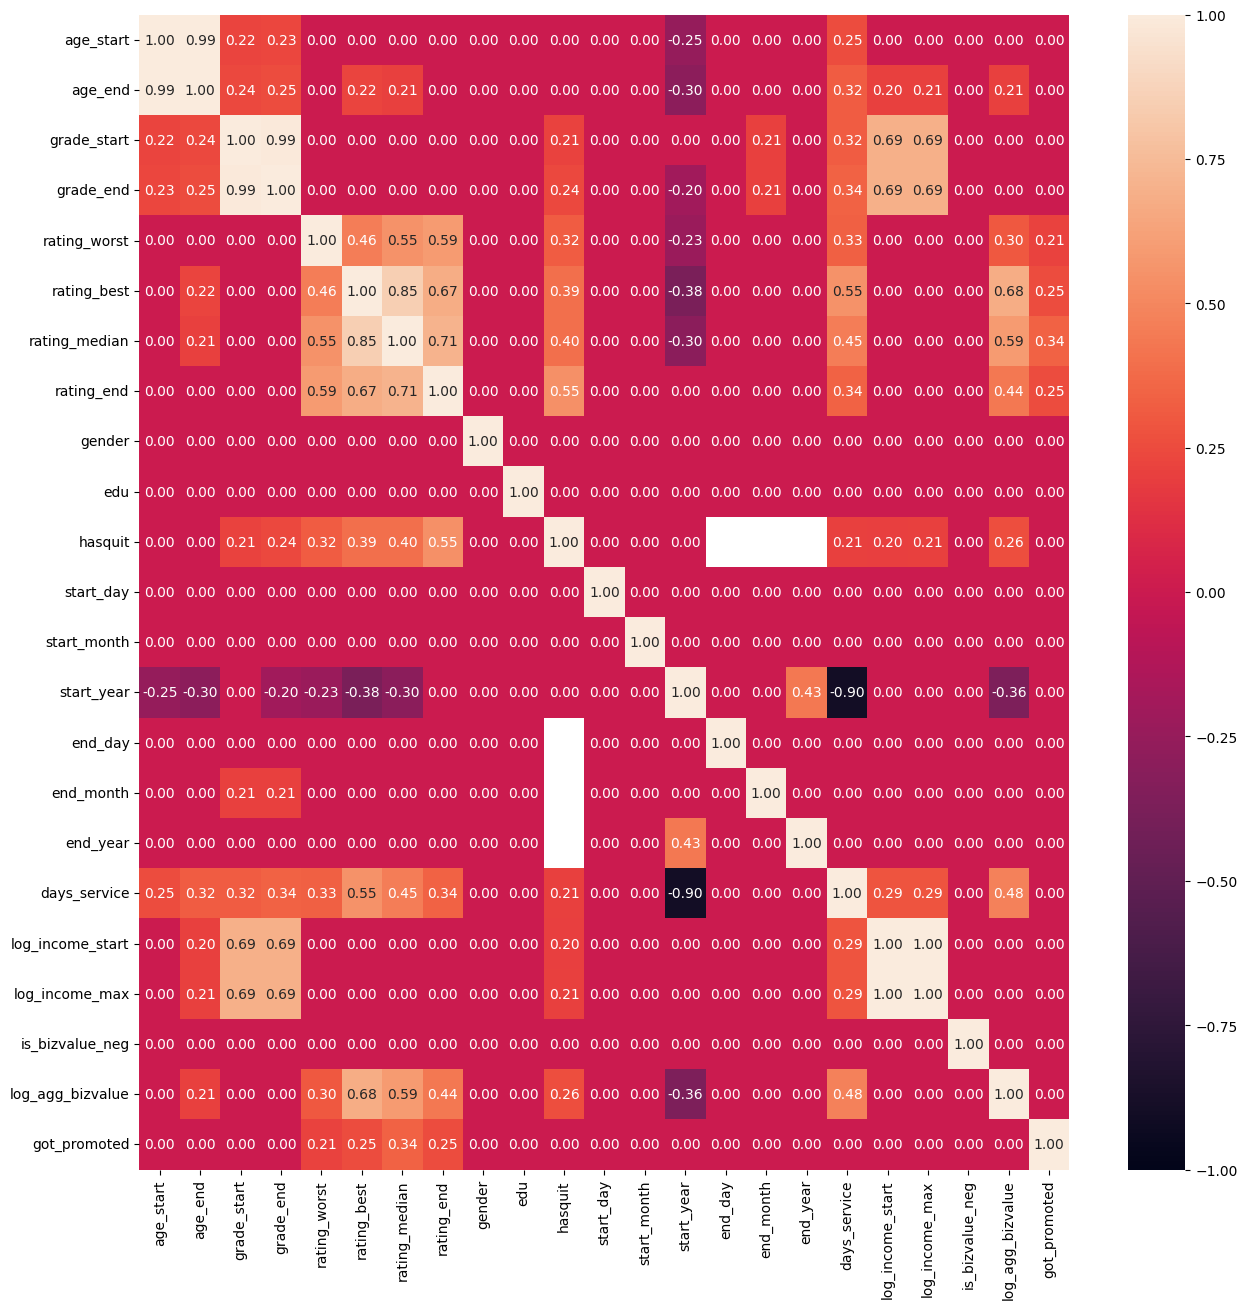

In [ ]:
a=df_agg.corr()
a[np.logical_and(a>-0.2,a<0.2)]=0

plt.figure(figsize=(15,15))
sns.heatmap(a,vmin=-1,vmax=1,annot=True,fmt=".2f")

Strong correlations exist between

- age_start and end
- starting income, maximum income and starting/ending job grade
- business value generated -> rating, days of service
- hasquit has mild correations to income, grade, business value and rating

# Hypothesis testing

In [ ]:
df_agg.head()

,age_start,age_end,grade_start,grade_end,rating_worst,rating_best,rating_median,rating_end,gender,edu,...,start_year,end_day,end_month,end_year,days_service,log_income_start,log_income_max,is_bizvalue_neg,log_agg_bizvalue,got_promoted
0,28.0,28.0,1,1,2,2,2.0,2,0.0,2,...,2018,11.0,3.0,2019.0,77.0,10.957573,10.957573,0,14.355262,0
1,31.0,31.0,2,2,1,1,1.0,1,0.0,2,...,2020,NaN,NaN,NaN,25.0,11.112687,11.112687,0,0.000000,0
2,43.0,43.0,2,2,1,1,1.0,1,0.0,2,...,2019,27.0,4.0,2020.0,142.0,11.091377,11.091377,0,12.765688,0
3,29.0,29.0,1,1,1,1,1.0,1,0.0,0,...,2019,7.0,3.0,2019.0,57.0,10.744365,10.744365,0,11.698243,0
4,31.0,31.0,3,3,1,2,2.0,2,1.0,1,...,2020,NaN,NaN,NaN,123.0,11.273754,11.273754,0,14.050583,0


In [ ]:
df_agg.dtypes

,0
age_start,float64
age_end,float64
grade_start,int64
grade_end,int64
rating_worst,int64
rating_best,int64
rating_median,float64
rating_end,int64
gender,float64
edu,int64


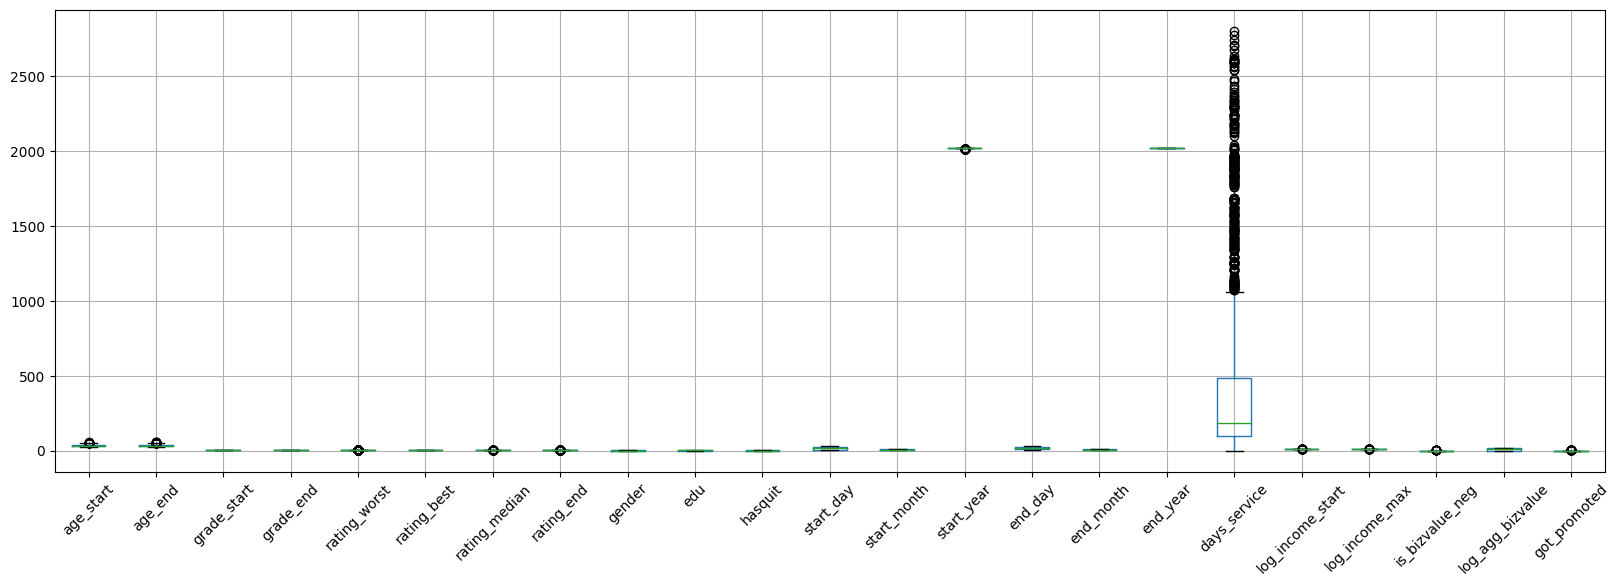

In [ ]:
plt.figure(figsize=(20,6))
df_agg.boxplot()
plt.xticks(rotation=45)
plt.show()

Null hypothesis: Feature distribution is same between quit and retained group.
Alternate: Cannot say feature distribution is same.

In [ ]:
from scipy.stats import chi2_contingency

cat_features=['grade_start','grade_end','rating_worst','rating_best','rating_median','rating_end','gender','edu','start_month','start_year','end_month','end_year','got_promoted']

for cat_feature in cat_features:
  print(cat_feature)
  # print(pd.crosstab(df_agg[cat_feature],df_agg['hasquit']))
  statistic,pvalue,dof,expfreq=chi2_contingency(pd.crosstab(df_agg[cat_feature],df_agg['hasquit']))

  if pvalue < 0.05:
    print('p-value = '+str(pvalue)+'. Reject null hypothesis. Feature distributions are not same between')
  else:
    print('Feature distribution are same between quit and retained groups. Cannot reject null hypothesis')
  print('\n')


grade_start
p-value = 1.2480081925914476e-23. Reject null hypothesis. Feature distributions are not same between


grade_end
p-value = 1.9499890395144209e-29. Reject null hypothesis. Feature distributions are not same between


rating_worst
p-value = 5.756937132856527e-55. Reject null hypothesis. Feature distributions are not same between


rating_best
p-value = 4.7301713532888525e-81. Reject null hypothesis. Feature distributions are not same between


rating_median
p-value = 7.403548724665066e-79. Reject null hypothesis. Feature distributions are not same between


rating_end
p-value = 4.5101700751507196e-160. Reject null hypothesis. Feature distributions are not same between


gender
Feature distribution are same between quit and retained groups. Cannot reject null hypothesis


edu
Feature distribution are same between quit and retained groups. Cannot reject null hypothesis


start_month
p-value = 1.015688372218123e-08. Reject null hypothesis. Feature distributions are not same betw

# Data visualization through PCA

In [ ]:
with open('/content/gdrive/My Drive/Colab Notebooks/driver_churn.pkl','rb') as file:
  X_scaled=pickle.load(file)
  y=pickle.load(file)
  X=pickle.load(file)

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2).fit(X_scaled)
pca_comp=pca.transform(X_scaled)

pca.explained_variance_ratio_

array([0.26329591, 0.15252193])

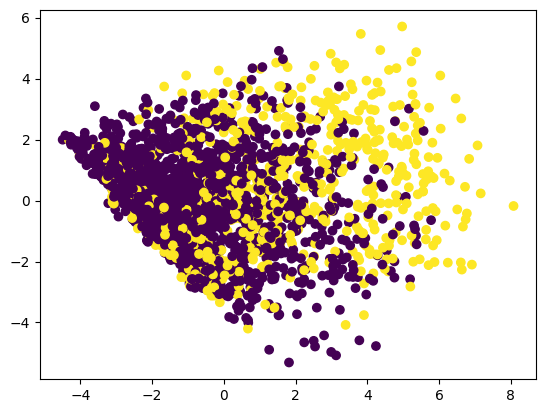

In [ ]:
plt.scatter(pca_comp[:,0],pca_comp[:,1],c=y)
plt.show()

# Machine Learning



1.   Logistic Reg
2.   DT
3. RandomForest
4.SVM

Does SMOTE improve prediction?

AUC-ROC and AUC-PRC

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)

In [ ]:
logreg=LogisticRegression().fit(X_train,y_train)
# cvalidate=cross_validate(logreg,X_train,y_train,cv=5,scoring='f1_score')

In [ ]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       319
           1       0.79      0.81      0.80       146

    accuracy                           0.87       465
   macro avg       0.85      0.86      0.85       465
weighted avg       0.87      0.87      0.87       465



Fitting 2 folds for each of 9 candidates, totalling 18 fits


Text(0.5, 0, 'Tree depth')

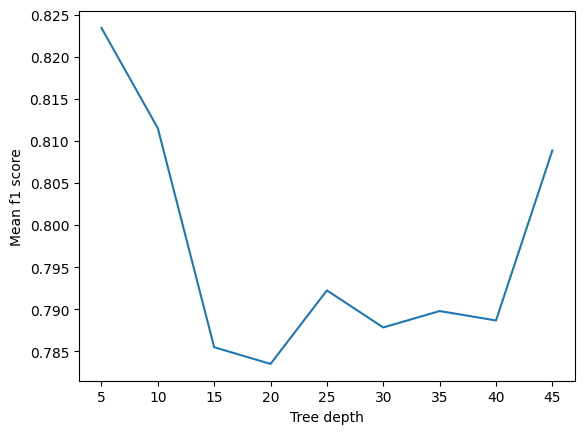

In [ ]:

param_space={'max_depth':np.arange(5,50,5)}
dt=DecisionTreeClassifier()
dt_gridsearch=GridSearchCV(dt,param_grid=param_space,scoring='f1',cv=2,verbose=3,n_jobs=-1)

dt_gridsearch.fit(X_train,y_train)

plt.plot(np.arange(5,50,5),dt_gridsearch.cv_results_['mean_test_score'])
plt.ylabel('Mean f1 score')
plt.xlabel('Tree depth')


Text(0, 0.5, 'Mean f1 score')

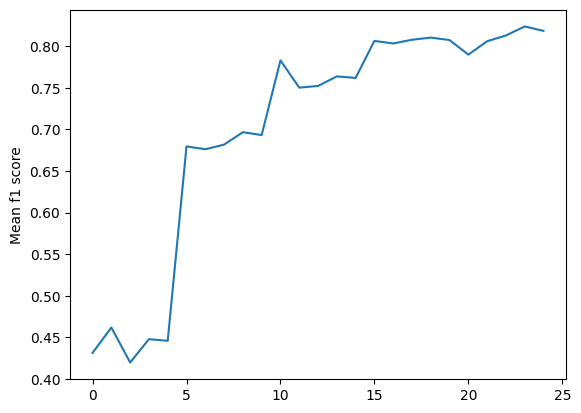

In [ ]:
rf_param_space={
    'n_estimators':np.arange(10,100,20),
    'max_depth':np.arange(1,10,2)
}

rf=RandomForestClassifier(random_state=1)

gs_rf_f1=GridSearchCV(rf,rf_param_space,scoring='f1',cv=2)

gs_rf_f1.fit(X_train,y_train)

plt.plot(np.arange(len(gs_rf_f1.cv_results_['mean_test_score'])),gs_rf_f1.cv_results_['mean_test_score'])
plt.ylabel('Mean f1 score')


In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier().fit(X_train,y_train)

# print(classification_report(y_test,xgb.predict(X_test)))

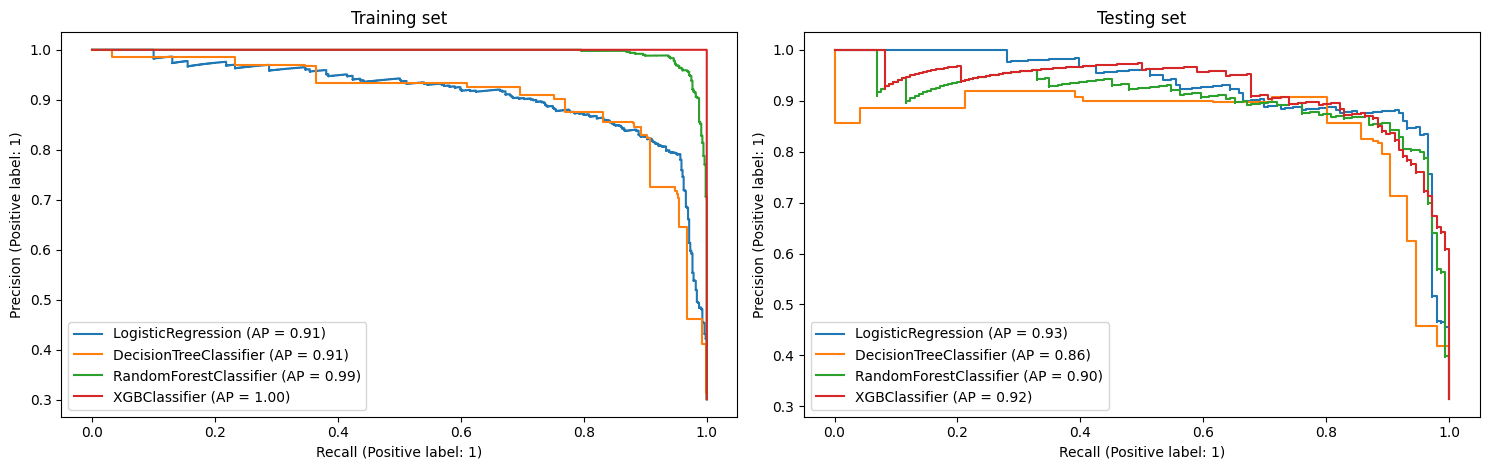

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(15)

PrecisionRecallDisplay.from_estimator(logreg,X_train,y_train,ax=ax[0])
PrecisionRecallDisplay.from_estimator(dt_gridsearch.best_estimator_,X_train,y_train,ax=ax[0])
PrecisionRecallDisplay.from_estimator(gs_rf_f1.best_estimator_,X_train,y_train,ax=ax[0])
PrecisionRecallDisplay.from_estimator(xgb,X_train,y_train,ax=ax[0])
ax[0].set_title('Training set')

PrecisionRecallDisplay.from_estimator(logreg,X_test,y_test,ax=ax[1])
PrecisionRecallDisplay.from_estimator(dt_gridsearch.best_estimator_,X_test,y_test,ax=ax[1])
PrecisionRecallDisplay.from_estimator(gs_rf_f1.best_estimator_,X_test,y_test,ax=ax[1])
PrecisionRecallDisplay.from_estimator(xgb,X_test,y_test,ax=ax[1])
ax[1].set_title('Testing set')


plt.tight_layout()
plt.show()


Decision tree is overfit on the training set, leading to significant reduction in AUC-PR between training and test results

RF and XGBoost are also slightly overfit. Overall RF and XGBoost give the best results with logistic regression not too far behind

In [ ]:
print(classification_report(y_test,logreg.predict(X_test)))
print(classification_report(y_test,gs_rf_f1.best_estimator_.predict(X_test)))
print(classification_report(y_test,xgb.predict(X_test)))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       319
           1       0.88      0.84      0.86       146

    accuracy                           0.91       465
   macro avg       0.90      0.89      0.90       465
weighted avg       0.91      0.91      0.91       465

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       319
           1       0.87      0.82      0.85       146

    accuracy                           0.91       465
   macro avg       0.90      0.88      0.89       465
weighted avg       0.90      0.91      0.90       465

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       319
           1       0.87      0.86      0.87       146

    accuracy                           0.92       465
   macro avg       0.90      0.90      0.90       465
weighted avg       0.92      0.92      0.92       465



# Over sampling to balance the data

In [ ]:
from imblearn.over_sampling import SMOTE

X_train_sm,y_train_sm = SMOTE().fit_resample(X_train,y_train)

print(y_train.value_counts())
print(y_train_sm.value_counts())

hasquit
0    1297
1     559
Name: count, dtype: int64
hasquit
0    1297
1    1297
Name: count, dtype: int64


In [ ]:
rf_param_space={
    'n_estimators':np.arange(10,150,30),
    'max_depth':np.arange(1,15,2)
}
rf_sm=RandomForestClassifier()
gs_rf_f1_sm=GridSearchCV(rf_sm,rf_param_space,scoring='f1',cv=2)

gs_rf_f1_sm.fit(X_train_sm,y_train_sm)

logreg_sm=LogisticRegression().fit(X_train_sm,y_train_sm)

xgb_sm=XGBClassifier().fit(X_train_sm,y_train_sm)


In [ ]:
print(classification_report(y_test,logreg_sm.predict(X_test)))
print(classification_report(y_test,gs_rf_f1_sm.best_estimator_.predict(X_test)))
print(classification_report(y_test,xgb_sm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       319
           1       0.80      0.97      0.87       146

    accuracy                           0.91       465
   macro avg       0.89      0.93      0.90       465
weighted avg       0.92      0.91      0.91       465

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       319
           1       0.87      0.88      0.87       146

    accuracy                           0.92       465
   macro avg       0.91      0.91      0.91       465
weighted avg       0.92      0.92      0.92       465

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       319
           1       0.86      0.88      0.87       146

    accuracy                           0.92       465
   macro avg       0.90      0.91      0.91       465
weighted avg       0.92      0.92      0.92       465



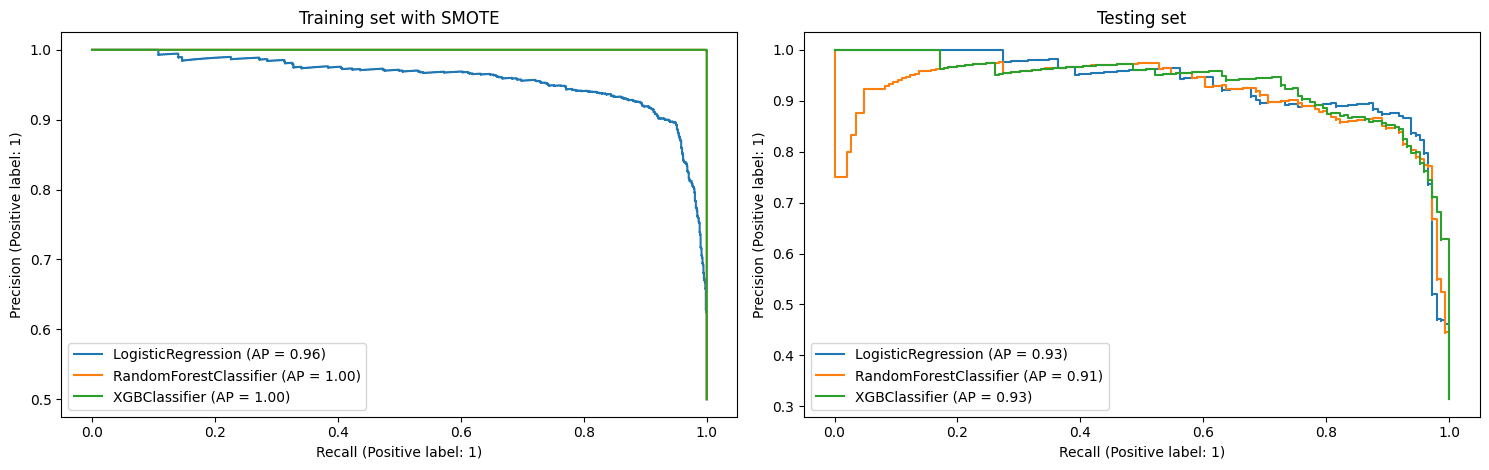

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(15)

PrecisionRecallDisplay.from_estimator(logreg_sm,X_train_sm,y_train_sm,ax=ax[0])
PrecisionRecallDisplay.from_estimator(gs_rf_f1_sm.best_estimator_,X_train_sm,y_train_sm,ax=ax[0])
PrecisionRecallDisplay.from_estimator(xgb_sm,X_train_sm,y_train_sm,ax=ax[0])
ax[0].set_title('Training set with SMOTE')

PrecisionRecallDisplay.from_estimator(logreg_sm,X_test,y_test,ax=ax[1])
PrecisionRecallDisplay.from_estimator(gs_rf_f1_sm.best_estimator_,X_test,y_test,ax=ax[1])
PrecisionRecallDisplay.from_estimator(xgb_sm,X_test,y_test,ax=ax[1])
ax[1].set_title('Testing set')


plt.tight_layout()
plt.show()


# Analysis of misclassified datapoints

In [ ]:
best_rf=gs_rf_f1.best_estimator_

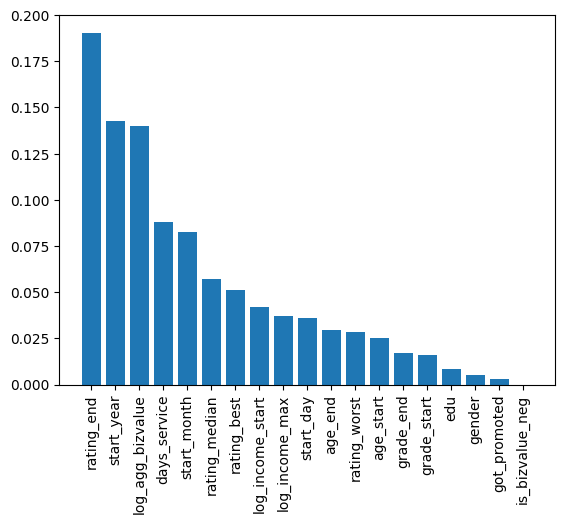

In [ ]:
feat_sortedinx=np.argsort(best_rf.feature_importances_)[::-1]

plt.bar(best_rf.feature_names_in_[feat_sortedinx],best_rf.feature_importances_[feat_sortedinx])
plt.xticks(rotation=90)
plt.show()

Age, gender, educational status are not the important parameters for driver quitting

Most recent rating is the most important trigger for driver quitting


In [ ]:
best_rf.predict_proba(X_train)

array([[0.97645113, 0.02354887],
       [0.39163065, 0.60836935],
       [0.98875797, 0.01124203],
       ...,
       [0.03869833, 0.96130167],
       [0.91985033, 0.08014967],
       [0.79447991, 0.20552009]])

In [ ]:
best_rf.predict(X_train)

array([0, 1, 0, ..., 1, 0, 0])

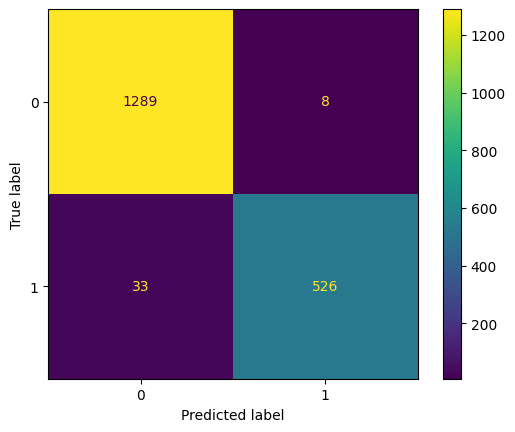

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train,best_rf.predict(X_train))).plot()
plt.show()

In [ ]:
df=X.copy()
df['label']=y
df['pred_label']=best_rf.predict(X)
df['mislabelled']=df['label']!=df['pred_label']

In [ ]:
df.head()

,age_start,age_end,grade_start,grade_end,rating_worst,rating_best,rating_median,rating_end,gender,edu,...,start_year,days_service,log_income_start,log_income_max,is_bizvalue_neg,log_agg_bizvalue,got_promoted,label,pred_label,mislabelled
0,28.0,28.0,1,1,2,2,2.0,2,0.0,2,...,2018,77.0,10.957573,10.957573,0,14.355262,0,0,1,True
1,31.0,31.0,2,2,1,1,1.0,1,0.0,2,...,2020,25.0,11.112687,11.112687,0,0.000000,0,1,0,True
2,43.0,43.0,2,2,1,1,1.0,1,0.0,2,...,2019,142.0,11.091377,11.091377,0,12.765688,0,0,1,True
3,29.0,29.0,1,1,1,1,1.0,1,0.0,0,...,2019,57.0,10.744365,10.744365,0,11.698243,0,0,1,True
4,31.0,31.0,3,3,1,2,2.0,2,1.0,1,...,2020,123.0,11.273754,11.273754,0,14.050583,0,1,1,False


ValueError: Could not interpret value `count` for `y`. An entry with this name does not appear in `data`.

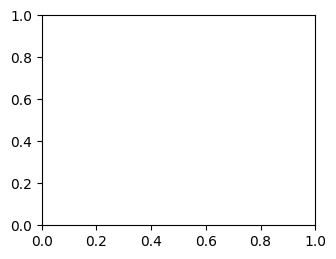

In [ ]:
import seaborn as sns

cat_feats=['gender','got_promoted','grade_end','rating_worst','edu','is_bizvalue_neg']

plt.figure(figsize=(12,6))
for inx,feat in enumerate(cat_feats):
  # print(pd.crosstab(df_train[feat],df_train['mislabelled']))
  plt.subplot(2,3,inx+1)
  sns.barplot(data=df.groupby(['mislabelled',feat]).agg('count').reset_index(),x='mislabelled',y='count',hue=feat,palette='viridis')


plt.tight_layout()
plt.show()
# sns.barplot(data=df_train,x='rating_end',hue='mislabelled')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
df.groupby(['mislabelled','gender']).value_counts()

mislabelled  gender  age_start  age_end  grade_start  grade_end  rating_worst  rating_best  rating_median  rating_end  edu  start_day  start_month  start_year  days_service  log_income_start  log_income_max  is_bizvalue_neg  log_agg_bizvalue  got_promoted  label  pred_label
False        0.0     21.0       21.0     1            1          1             1            1.0            1           0    19         10           2018        95.0          10.133488         10.133488       0                0.000000          0             0      0             1
                     22.0       22.0     1            1          1             1            1.0            1           0    6          12           2019        100.0         9.505023          9.505023        0                0.000000          0             0      0             1
                     33.0       34.0     1            1          1             1            1.0            1           0    4          8            2019        86.0          10.486345         10.486345       0                0.000000          0             0      0             1
                                35.0     3            3          1             3            2.0            2           1    18         5            2014        2389.0        11.558969         11.558969       0                16.811824         0             1      1             1
                                                                               4            3.0            3           1    6          10           2013        2613.0        11.205558         11.205558       0                16.778562         0             1      1             1
                                                                                                                                                                                                                                                                                     ..
True         1.0     28.0       28.0     2            2          1             2            2.0            1           1    30         10           2018        243.0         11.254116         11.254116       0                14.905392         0             0      1             1
                                         4            4          1             2            2.0            1           2    30         3            2019        124.0         11.612273         11.612273       0                13.774689         0             0      1             1
                                29.0     1            1          1             2            1.0            1           0    1          1            2018        565.0         10.901008         10.901008       0                14.286545         0             0      1             1
                                                                                            2.0            1           0    2          11           2019        244.0         10.640652         10.640652       0                14.822055         0             0      1             1
                     58.0       58.0     1            1          3             3            3.0            3           1    4          5            2018        449.0         10.281992         10.281992       0                15.012791         0             0      1             1
Name: count, Length: 2321, dtype: int64

In [ ]:
import seaborn as sns

num_feats=['age_end','days_service','log_income_max','log_agg_bizvalue','start_day']

plt.figure(figsize=(12,6))
for inx,feat in enumerate(num_feats):
  plt.subplot(2,3,inx+1)
  sns.histplot(data=df,x=feat,hue='mislabelled',palette='viridis')


plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.heatmap(df_train[df_train['mislabelled']==True].corr())

plt.subplot(122)
sns.heatmap(df_train[df_train['mislabelled']==False].corr()-df_train[df_train['mislabelled']==True].corr())


In [ ]:
plt.scatter(pca_comp[:,0],pca_comp[:,1],c=np.abs(y-best_rf.predict(X)))
plt.show()